# Lab 02: Exploratory Data Analysis
**Do not use loops in this lab**


- Name: Lê Nguyễn Bình Nam

- Student's ID: 20127567

***
## How to do and submit assignments

&#9889; You should note that I will be using a grading support program, so you need to follow the exact rules that I set, if you are not sure, please ask me, not arbitrarily follow your own will.

**How to do**
You will do it directly on this notebook file. First, enter your name and student's id in the file header above. In the file, you will complete the required in the position where be written:

```python
# YOUR CODE HERE
raise NotImplementedError()
```

When you do, you delete the line `raise NotImplementedError()`.

For the parts that require code, usually right below there will be a cell (or several) containing test sets to help you know if the code is correct or not. If running this cell has no errors, it means that the test sets are passed.

In some cases, the test suites may be incomplete, that is, if the test fails, the code is wrong, but if it passes the test, it is not sure correct.

While doing the test, you can print to the screen, create more cells for testing. But when submitting, you delete the cells that you create, delete or comment the statements printed to the screen. Please note that <font color=red> must not delete cells or edit my code </font> (except where editing is allowed as mentioned above).

While doing the test, often `Ctrl + S` to save your work, avoid loss of information.

**How to submit**

When grading, I will first choose `Kernel` - `Restart & Run All`, to restart and run all cells in your notebook; therefore, before submitting your lab, you should test run `Kernel` - `Restart & Run All` to make sure everything goes as expected.

Then you create a submission folder with the following structure:
- The `ID's student` folder (eg, if you have an MSSV of 1234567, name the folder `1234567`)
     - File `Lab02_Exploratory_Data_Analysis.ipynb` (no need to submit other files)

Finally, you zip this `ID's studen` folder and submit it at the link on moodle. The extension of the compressed file must be .zip (not .rar or anything else).


---

## Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
# YOUR CODE HERE (OPTION) 
# You can import others library in here

---

## Data Collection

The data used in this exercise is the StackOverflow developer survey data. I downloaded the data [here](https://drive.google.com/file/d/1dfGerWeWkcyQ9GX9x20rdSGj7WtEpzBB/view) and removed some columns to simplify.

As described in the StackOverflow "README_2020.txt" file:
>The enclosed data set is the full, cleaned results of the 2020 Stack Overflow Developer Survey. Free response submissions and personally identifying information have been removed from the results to protect the privacy of respondents. There are three files besides this README:
>
>1. survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer
>2. survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name
>3. so_survey_2020.pdf - PDF file of survey instrument
>
>The survey was fielded from February 5 to February 28, 2020. The median time spent on the survey for qualified responses was 16.6 minutes.
>
>Respondents were recruited primarily through channels owned by Stack Overflow. The top 5 sources of respondents were onsite messaging, blog posts, email lists, Meta posts, banner ads, and social media posts. Since respondents were recruited in this way, highly engaged users on Stack Overflow were more likely to notice the links for the survey and click to begin it.

The file "survey_results_public-short.csv" that I attached is a simplified version of the file "survey_results_public.csv" (from 61 columns, I reduced to 29 columns). This is the main data file that you will work with in this lab. In addition, I have attached 2 additional files: (1) the file "survey_results_schema-short.csv" is the file that shows the meaning of the columns, and (2) the file "so_survey_2020.pdf" is the original survey file of StackOverflow.

>This database - The Public 2020 Stack Overflow Developer Survey Results - is made available under the Open Database License (ODbL): http://opendatacommons.org/licenses/odbl/1.0/. Any rights in individual contents of the database are licensed under the Database Contents License: http://opendatacommons.org/licenses/dbcl/1.0/
>
>TLDR: You are free to share, adapt, and create derivative works from The Public 2020 Stack Overflow Developer Survey Results as long as you attribute Stack Overflow, keep the database open (if you redistribute it), and continue to share-alike any adapted database under the ODbl.


---

## Data Exploratory

### Load data (0.25đ)

First, you will read data file "survey_results_public-short.csv" and save to DataFrame `survey_df`. In addition, you also need to set the `Respondent` column (the surveyor's id) to the index column of `survey_df`.

In [2]:
# YOUR CODE HERE
survey_df = pd.read_csv("survey_results_public-short.csv").set_index(['Respondent'])

In [3]:
# TEST
survey_df.head()

,MainBranch,Hobbyist,Age,ConvertedComp,Country,DevType,EdLevel,Employment,Ethnicity,Gender,...,NEWEdImpt,NEWLearn,NEWOvertime,NEWStuck,OpSys,PlatformDesireNextYear,PlatformWorkedWith,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Yes,NaN,NaN,Germany,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,...,Fairly important,Once a year,Often: 1-2 days per week or more,Visit Stack Overflow;Go for a walk or other ph...,Windows,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,50.0,36,27
2,I am a developer by profession,No,NaN,NaN,United Kingdom,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,...,Fairly important,Once a year,NaN,Visit Stack Overflow;Go for a walk or other ph...,MacOS,iOS;Kubernetes;Linux;MacOS,iOS,NaN,7,4
3,I code primarily as a hobby,Yes,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,...,NaN,Once a decade,NaN,NaN,Linux-based,NaN,NaN,NaN,4,NaN
4,I am a developer by profession,Yes,25.0,NaN,Albania,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,...,Not at all important/not necessary,Once a year,Occasionally: 1-2 days per quarter but less th...,NaN,Linux-based,NaN,NaN,40.0,7,4
5,"I used to be a developer by profession, but no...",Yes,31.0,NaN,United States,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,...,Very important,Once a year,NaN,Call a coworker or friend;Visit Stack Overflow...,Windows,Docker;Google Cloud Platform;Heroku;Linux;Windows,AWS;Docker;Linux;MacOS;Windows,NaN,15,8


### How many rows and columns does the data have?(0.25đ)

Next, you get the number of rows and columns of the DataFrame `survey_df` and store it in `num_rows` and `num_cols` variables.

In [4]:
# YOUR CODE HERE
num_rows, num_cols = survey_df.shape[0], survey_df.shape[1]

In [5]:
# TEST
assert num_rows == 64461
assert num_cols == 28

### What does each sample mean? Does it matter that the samples have different meanings?

According to the file "README_2020.txt" as well as a preliminary observation of the data, each sample in the DataFrame `survey_df` indicates the results of a person's survey. It doesn't seem to matter the samples have different meanings.

### Does the data have duplicate sample?(0.25đ)

Next, you calculate the number of samples where the index (surveyer's id) is duplicated and store it in the variable `num_duplicated_rows`. In a group of samples with the same index, the first sample is not counted as duplicated.

In [6]:
# YOUR CODE HERE
num_duplicated_rows = survey_df.index.duplicated().sum()

In [7]:
# TEST
assert num_duplicated_rows == 0

### What does each column mean? (0.25đ)

To see what each column means:
+ First you need to read the file "survey_results_schema-short.csv" into the DataFrame `col_meaning_df`; you also need for column "Column" as index column.
+ After that, you just need to display the DataFrame `col_meaning_df` to see. However, you will see in the "QuestionText" column: the description strings are truncated because they are too long. Therefore, before displaying the DataFrame `col_meaning_df`, you also need to adjust it so that the description strings are not cut (suggestion: you will use the `pd.set_option` command).

In [8]:
# YOUR CODE HERE
pd.set_option("display.max_colwidth", None)
col_meaning_df = pd.read_csv("survey_results_schema-short.csv").set_index(["Column"])

In [9]:
# TEST
col_meaning_df

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order of survey response time)
MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
Hobbyist,Do you code as a hobby?
Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks."
Country,Where do you live?
DevType,Which of the following describe you? Please select all that apply.
EdLevel,Which of the following best describes the highest level of formal education that you’ve completed?
Employment,Which of the following best describes your current employment status?


### What data type does each column currently have? Is there a column with a data type that is not suitable for further processing? (0.25đ)

Next, you get the data type (dtype) of each column in the DataFrame `survey_df` and save the result in the Series `dtypes` (this series has the index as the column name).

In [10]:
# YOUR CODE HERE
dtypes = survey_df.dtypes
dtypes

MainBranch                       object
Hobbyist                         object
Age                             float64
ConvertedComp                   float64
Country                          object
DevType                          object
EdLevel                          object
Employment                       object
Ethnicity                        object
Gender                           object
JobFactors                       object
JobSat                           object
LanguageDesireNextYear           object
LanguageWorkedWith               object
MiscTechDesireNextYear           object
MiscTechWorkedWith               object
NEWCollabToolsDesireNextYear     object
NEWCollabToolsWorkedWith         object
NEWEdImpt                        object
NEWLearn                         object
NEWOvertime                      object
NEWStuck                         object
OpSys                            object
PlatformDesireNextYear           object
PlatformWorkedWith               object


In [11]:
# TEST
float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
assert float_cols == {'Age', 'ConvertedComp', 'WorkWeekHrs'}
object_cols = set(dtypes[dtypes == object].index)
assert len(object_cols) == 25

As you can see, the "YearsCode" and "YearsCodePro" columns should have a numeric data type, but now have an object data type. Let's try to see more about these 2-column values.

In [12]:
survey_df['YearsCode'].unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [13]:
survey_df['YearsCodePro'].unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

We should convert these 2 columns into numeric form so that we can continue to explore (calculate min, median, max, ...).

---

## Data preprocessing (0.5đ)

You will perform preprocessing to convert the 2 columns "YearsCode" and "YearsCodePro" to numeric (float). In which: "Less than 1 year" $\to$ 0, "More than 50 years" $\to$ 51. After transferring, `survey_df.dtypes` will change.

In [14]:
# YOUR CODE HERE

survey_df['YearsCode'] = survey_df['YearsCode'].replace(to_replace = ['Less than 1 year','More than 50 years'],value = ['0','51'])
survey_df['YearsCodePro'] = survey_df['YearsCodePro'].replace(to_replace = ['Less than 1 year','More than 50 years'],value = ['0','51'])
survey_df['YearsCode'] = survey_df['YearsCode'].astype(float)
survey_df['YearsCodePro'] = survey_df['YearsCodePro'].astype(float)
survey_df.dtypes

MainBranch                       object
Hobbyist                         object
Age                             float64
ConvertedComp                   float64
Country                          object
DevType                          object
EdLevel                          object
Employment                       object
Ethnicity                        object
Gender                           object
JobFactors                       object
JobSat                           object
LanguageDesireNextYear           object
LanguageWorkedWith               object
MiscTechDesireNextYear           object
MiscTechWorkedWith               object
NEWCollabToolsDesireNextYear     object
NEWCollabToolsWorkedWith         object
NEWEdImpt                        object
NEWLearn                         object
NEWOvertime                      object
NEWStuck                         object
OpSys                            object
PlatformDesireNextYear           object
PlatformWorkedWith               object


In [15]:
# TEST
assert survey_df['YearsCode'].dtype in [np.float32, np.float64]
assert survey_df['YearsCodePro'].dtype in [np.float32, np.float64]

---

## Back to data exploratory step

### For each column with numeric data type, how are the values distributed? (1d)

For columns with numeric data type, you would calculate:
- Percentage (from 0 to 100) of missing values
- Min value
- Lower quartile value (25th percentile)
- Median value (50th percentile)
- Upper quartile value (75th percentile)
- Max value

You will save the result into a DataFrame `nume_col_info_df`, where:
- The names of the columns are the names of the numeric columns in `survey_df`
- The names of the lines are: "missing_percentage", "min", "lower_quartile", "median", "upper_quartile", "max"

All your values are rounded to 1 decimal place using the `.round(1)` method.

In [16]:
# YOUR CODE HERE
# choose columns of numerical dtypes
numeric_survey_df = survey_df.select_dtypes(include = ['float64'])

nume_col_info_df = numeric_survey_df.describe().T.drop(columns=['mean', 'std'])
nume_col_info_df['count'] = (len(survey_df) - nume_col_info_df['count']) / len(survey_df) * 100
nume_col_info_df = nume_col_info_df.rename(columns={'count': 'missing_percentage', 
                                                  '25%': 'lower_quartile',
                                                 '50%': 'median',
                                                 '75%': 'upper_quartile'})
nume_col_info_df = nume_col_info_df.round(1).T
nume_col_info_df

,Age,ConvertedComp,WorkWeekHrs,YearsCode,YearsCodePro
missing_percentage,29.5,46.1,36.2,10.5,28.1
min,1.0,0.0,1.0,0.0,0.0
lower_quartile,24.0,24648.0,40.0,6.0,3.0
median,29.0,54049.0,40.0,10.0,6.0
upper_quartile,35.0,95000.0,44.0,17.0,12.0
max,279.0,2000000.0,475.0,51.0,51.0


In [17]:
# TEST
assert nume_col_info_df.shape == (6, 5)
data = nume_col_info_df.loc[['missing_percentage', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max'],
                           ['Age', 'ConvertedComp', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']].values
correct_data = np.array([[     29.5,      46.1,      36.2,      10.5,      28.1],
                         [      1. ,       0. ,       1. ,       0. ,       0. ],
                         [     24. ,   24648. ,      40. ,       6. ,       3. ],
                         [     29. ,   54049. ,      40. ,      10. ,       6. ],
                         [     35. ,   95000. ,      44. ,      17. ,      12. ],
                         [    279. , 2000000. ,     475. ,      51. ,      51. ]])
assert np.array_equal(data, correct_data)

**Is there an invalid value in each column? (does not consider missing values)**
- Column "Age": you calculate the number of invalid values ​​of column "Age" (< corresponding value in column "YearsCode" OR < corresponding value in column "YearsCodePro") and save the result in variable `num_invalid_Age_vals`.
- Column "WorkWeekHrs" (average working hours per week): we see max is 475 hours! Meanwhile, 7 days * 24 hours = 168 hours! Calculate the number of invalid values ​​of the column "WorkWeekHrs" (> 24 * 7) and store the result in the variable `num_invalid_WorkWeekHrs`.
- Column "YearsCode": you calculate the number of invalid values ​​of column "YearsCode" (< corresponding value in column "YearsCodePro" OR > corresponding value in column "Age") and save the result in variable `num_invalid_YearsCode`.
- Column "YearsCodePro": you calculate the number of invalid values ​​of column "YearsCodePro" (> corresponding value in column "YearsCode" OR > corresponding value in column "Age") and save the result in variable `num_invalid_YearsCodePro`.

In [18]:
# YOUR CODE HERE
not_valid_age = ((survey_df["Age"] < survey_df["YearsCode"]) | (survey_df["Age"] < survey_df["YearsCodePro"]))
num_invalid_Age_vals = not_valid_age.sum()
not_valid_workweekhrs = (survey_df["WorkWeekHrs"] > 24*7)
num_invalid_WorkWeekHrs_vals = not_valid_workweekhrs.sum()
not_valid_yearcode = ((survey_df["YearsCode"] < survey_df["YearsCodePro"]) | (survey_df["Age"] < survey_df["YearsCode"]))
num_invalid_YearsCode_vals = not_valid_yearcode.sum()
not_valid_yearcodepro = ((survey_df["YearsCodePro"] > survey_df["YearsCode"])| (survey_df["YearsCodePro"] > survey_df["Age"]))
num_invalid_YearsCodePro_vals = not_valid_yearcodepro.sum()

In [19]:
# TEST
assert num_invalid_WorkWeekHrs_vals == 62
assert num_invalid_Age_vals == 16
assert num_invalid_YearsCode_vals == 499
assert num_invalid_YearsCodePro_vals == 486

Since the number of invalid values is also quite small, we can preprocess it by deleting lines containing invalid values.

---

## Preprocessing (0.5đ)

You will perform preprocessing to remove rows of DataFrame `survey_df` that contain at least one invalid value. After preprocessing `survey_df` will change.

In [20]:
# YOUR CODE HERE
survey_df = survey_df[~(not_valid_age | not_valid_workweekhrs | not_valid_yearcode | not_valid_yearcodepro)]

In [21]:
# TEST
assert len(survey_df) == 63900

---

## Back to data exploratory step

### For each column with a non-numeric data type, how are the values distributed? (1đ)

For columns with non-numeric data types, you would calculate:
- The percentage (from 0 to 100) of missing values
- Number of values ​​(the values ​​here are different and we do not consider missing values): for the column that corresponds to the multichoice question (for example, the column "DevType"), each value has can contain many choices (choices are separated by semicolons), and directly counting the values ​​does not make much sense because the number of combinations of choices is quite large; another better way you would do it is to count the number of choices
- The percentage (from 0 to 100) of each value is sorted by a descending percentage (we do not consider missing values): you use a dictionary to save, key is the value, value is the percentage; for the column that corresponds to the multichoice question, the same way as above

You will save the result into a DataFrame `cate_col_info_df`, where:
- The names of the columns are the names of the non-numeric columns in `survey_df`
- The names of the rows are: "missing_percentage", "num_values", "value_percentages"

all values ​​you round to 1 decimal place using the `.round(1)` method.

Hint: you'll probably want to use the [explode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.explode.html) method.

In [22]:
# Các cột ứng với câu hỏi khảo sát multichoice
multichoice_cols = ['DevType', 'Gender', 'JobFactors', 
                    'LanguageWorkedWith', 'LanguageDesireNextYear', 
                    'MiscTechWorkedWith', 'MiscTechDesireNextYear', 
                    'NEWCollabToolsWorkedWith', 'NEWCollabToolsDesireNextYear', 
                    'PlatformWorkedWith', 'PlatformDesireNextYear', 
                    'NEWStuck']

In [23]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
# YOUR CODE HERE
def different(list1, list2):
    return list(set(list1) - set(list2)) + list(set(list2) - set(list1))

def num_values(x):
    return x.str.split(';').explode().nunique()

def missing_percentage(x):
    return (x.isnull().sum() * 100 / len(x)).round(1)

def value_percentages(x):
    return x.str.split(';').explode().value_counts(normalize=True).apply(lambda x: x*100).round(1).to_dict()

# Only categorical attributes
cols_name = different(survey_df.columns.tolist() , survey_df.select_dtypes(include=np.number).columns.tolist())

# List of aggregate functions
rows_name = [missing_percentage, num_values, value_percentages]

# Aggregate
cate_col_info_df = survey_df[cols_name].agg(rows_name)

cate_col_info_df

,JobFactors,Hobbyist,MiscTechDesireNextYear,Employment,MiscTechWorkedWith,NEWLearn,Country,LanguageDesireNextYear,NEWCollabToolsWorkedWith,NEWOvertime,NEWCollabToolsDesireNextYear,Gender,LanguageWorkedWith,OpSys,Ethnicity,PlatformWorkedWith,NEWStuck,MainBranch,EdLevel,NEWEdImpt,DevType,PlatformDesireNextYear,JobSat
missing_percentage,23.4,0.1,34.3,0.9,37.5,12.9,0.6,16.0,18.0,33.1,26.6,21.5,11.0,12.8,28.6,16.5,14.7,0.5,11.0,25.0,23.6,21.5,30.1
num_values,11,2,19,7,19,4,183,25,11,5,11,3,25,4,10,16,9,5,9,5,23,16,5
value_percentages,"{'Languages, frameworks, and other technologies I’d be working with': 17.5, 'Office environment ...","{'Yes': 78.2, 'No': 21.8}","{'Node.js': 17.0, 'TensorFlow': 10.1, '.NET Core': 9.6, 'React Native': 8.4, '.NET': 6.9, 'Flutt...","{'Employed full-time': 70.8, 'Student': 12.3, 'Independent contractor, freelancer, or self-emplo...","{'Node.js': 23.1, '.NET': 15.7, '.NET Core': 12.0, 'Pandas': 7.0, 'TensorFlow': 5.2, 'React Nati...","{'Every few months': 37.3, 'Once a year': 36.9, 'Once every few years': 23.7, 'Once a decade': 2.2}","{'United States': 19.5, 'India': 13.0, 'United Kingdom': 6.1, 'Germany': 6.1, 'Canada': 3.4, 'Fr...","{'Python': 11.2, 'JavaScript': 11.0, 'HTML/CSS': 8.7, 'SQL': 8.4, 'TypeScript': 7.2, 'C#': 5.7, ...","{'Github': 22.2, 'Slack': 14.2, 'Jira': 12.8, 'Google Suite (Docs, Meet, etc)': 11.1, 'Gitlab': ...","{'Sometimes: 1-2 days per month but less than weekly': 26.7, 'Often: 1-2 days per week or more':...","{'Github': 24.7, 'Slack': 14.1, 'Gitlab': 11.3, 'Google Suite (Docs, Meet, etc)': 10.6, 'Jira': ...","{'Man': 90.8, 'Woman': 7.9, 'Non-binary, genderqueer, or gender non-conforming': 1.2}","{'JavaScript': 13.5, 'HTML/CSS': 12.6, 'SQL': 10.9, 'Python': 8.8, 'Java': 8.0, 'Bash/Shell/Powe...","{'Windows': 48.3, 'Linux-based': 26.6, 'MacOS': 25.1, 'BSD': 0.1}","{'White or of European descent': 63.1, 'South Asian': 9.5, 'Hispanic or Latino/a/x': 7.0, 'Middl...","{'Linux': 16.6, 'Windows': 16.0, 'Docker': 10.6, 'AWS': 8.1, 'Android': 7.9, 'MacOS': 7.2, 'Rasp...","{'Visit Stack Overflow': 26.7, 'Do other work and come back later': 16.1, 'Watch help / tutorial...","{'I am a developer by profession': 73.5, 'I am a student who is learning to code': 12.5, 'I am n...","{'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 46.3, 'Master’s degree (M.A., M.S., M.Eng., MBA...","{'Fairly important': 26.2, 'Very important': 24.4, 'Somewhat important': 23.5, 'Not at all impor...","{'Developer, back-end': 17.4, 'Developer, full-stack': 17.3, 'Developer, front-end': 11.7, 'Deve...","{'Linux': 14.3, 'Docker': 12.2, 'AWS': 9.6, 'Windows': 9.3, 'Android': 7.9, 'Kubernetes': 7.3, '...","{'Very satisfied': 32.4, 'Slightly satisfied': 30.9, 'Slightly dissatisfied': 15.8, 'Neither sat..."


In [24]:
# TEST
c = cate_col_info_df['MainBranch']
assert c.loc['missing_percentage'] == 0.5
assert c.loc['num_values'] == 5
assert c.loc['value_percentages']['I am a developer by profession'] == 73.5

c = cate_col_info_df['Hobbyist']
assert c.loc['missing_percentage'] == 0.1
assert c.loc['num_values'] == 2
assert c.loc['value_percentages']['Yes'] == 78.2

c = cate_col_info_df['DevType']
assert c.loc['missing_percentage'] == 23.6
assert c.loc['num_values'] == 23
assert c.loc['value_percentages']['Academic researcher'] == 2.2

c = cate_col_info_df['PlatformWorkedWith']
assert c.loc['missing_percentage'] == 16.5
assert c.loc['num_values'] == 16
assert c.loc['value_percentages']['Docker'] == 10.6

---

## Make a question

After exploring the data, we have a better understanding of the data. Now, let's see if there are any questions that can be answered with this data.

**A possible question is:** Which platform (Windows, Linux, Docker, AWS, ...) is the most popular, which is the second favorite, which is the three favorite, ...?

A platform is considered popular if a person is already using the platform (column "PlatformWorkedWith") and wants to continue using the platform in the next year (column "PlatformDesireNextYear").

Answering this question will partly help us orient which platform to focus on to prepare for the future. (only true in this lab)

---

## Preprocessing

If you feel you need to do more preprocessing to prepare your data for analysis, do it here. This step is optional.

In [25]:
# YOUR CODE HERE (OPTION) 

---

## Data Analysis (2.25đ)

Now, you will perform data analysis to answer the question above. Specifically, the steps are as follows:
- Step 1: calculate Series `most_loved_platforms`, where:
     - Index is the name of the platform (in the data discovery step, you have seen there are 16 platforms in all)
     - Data is the percentage of favorites (sorted in descending order)
- Step 2: from Series `most_loved_platforms`, draw a bar chart:
     - You put the bars horizontally (for easy viewing)
     - You name the horizontal axis "Percentage"

Step 1

In [26]:
# YOUR CODE HERE
platform_df = survey_df[['PlatformWorkedWith', 'PlatformDesireNextYear']].dropna()
platform_df.reset_index(drop=True, inplace=True)

platform_df = platform_df.assign(PlatformWorkedWith = platform_df['PlatformWorkedWith'].str.split(';').values)
platform_df = platform_df.assign(PlatformDesireNextYear = platform_df['PlatformDesireNextYear'].str.split(';').values)

# "Explode" both 2 columns
platform_df = platform_df.set_index(['PlatformWorkedWith']).apply(pd.Series.explode).reset_index()
platform_df = platform_df.set_index(['PlatformDesireNextYear']).apply(pd.Series.explode).reset_index()

# Boolean lists - keep platform
# True = keep platform, False = switch platform
condition_keep_platform = platform_df['PlatformWorkedWith'] == platform_df['PlatformDesireNextYear']
list_keep_platform = np.where(condition_keep_platform, True, False)

# Just keep rows have (keep_platform == True)
platform_df['keep_platform'] = list_keep_platform
platform_df = platform_df[platform_df['keep_platform'] == True].drop(columns=['keep_platform'])

# Calculate the %
most_loved_platforms = platform_df['PlatformWorkedWith'].value_counts(normalize=True).apply(lambda x: x*100).round(1).sort_values(ascending=False)
most_loved_platforms

Linux                          20.2
Windows                        14.6
Docker                         12.3
AWS                             8.5
MacOS                           7.4
Android                         7.1
Raspberry Pi                    4.7
Microsoft Azure                 4.3
Google Cloud Platform           4.1
Kubernetes                      3.9
iOS                             3.5
Arduino                         2.7
Heroku                          2.4
WordPress                       2.2
Slack Apps and Integrations     1.8
IBM Cloud or Watson             0.3
Name: PlatformWorkedWith, dtype: float64

In [27]:
# TEST
assert len(most_loved_platforms) == 16
assert most_loved_platforms.loc['Linux'] == 20.2
assert most_loved_platforms.loc['Windows'] == 14.6
assert most_loved_platforms.loc['Docker'] == 12.3

Step 2

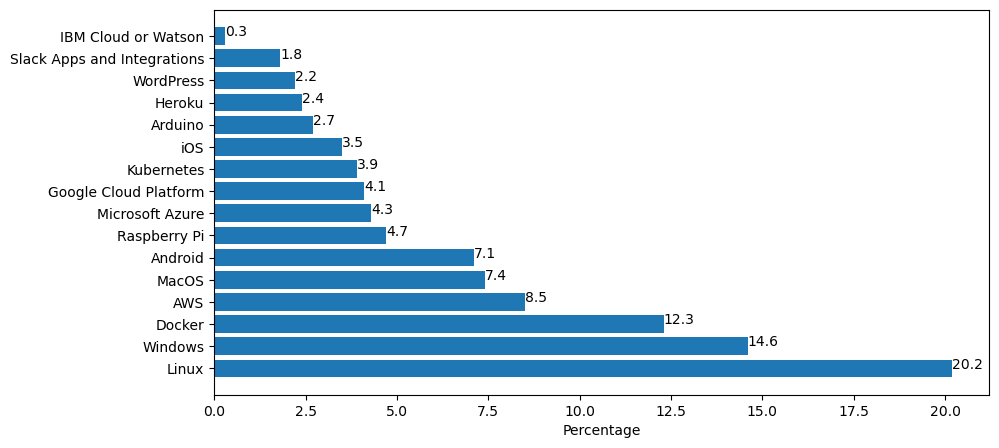

In [28]:
# YOUR CODE HERE
plt.figure(figsize=(10,5))
plt.barh(most_loved_platforms.index, most_loved_platforms)
plt.xlabel("Percentage")
for index, value in enumerate(most_loved_platforms):
    plt.text(value, index,
             str(value))
plt.show()

---

## Make your question (1.5đ)

Now it's your turn to think for yourself and come up with a question that can be answered with data. In addition to asking questions, you must also explain to the reader what the benefit of answering the question would be. You should be a little creative, don't ask the same question as your question above. 

YOUR ANSWER HERE

**Question: Is there any relationship between education level and salary in IT field? Does the "higher" degree mean the "higher" salary?**
Some conclusions are obtained after the analysis:

* The 3 educational levels with the most programmers are:
    * Bachelor degree
    * Master's Degree
    * Attended college, but did not receive/get a degree
* Higher education **not sure** leads to higher salary. However, we can note that, in general, higher education leads to more programmers with higher salaries.
* This conclusion may be strongly influenced by the different number of survey participants at different educational levels.

---

## Preprocessing

This section is optional.

In [29]:
# YOUR CODE HERE (OPTION) 

---

## Analyze data to answer your questions (2đ)

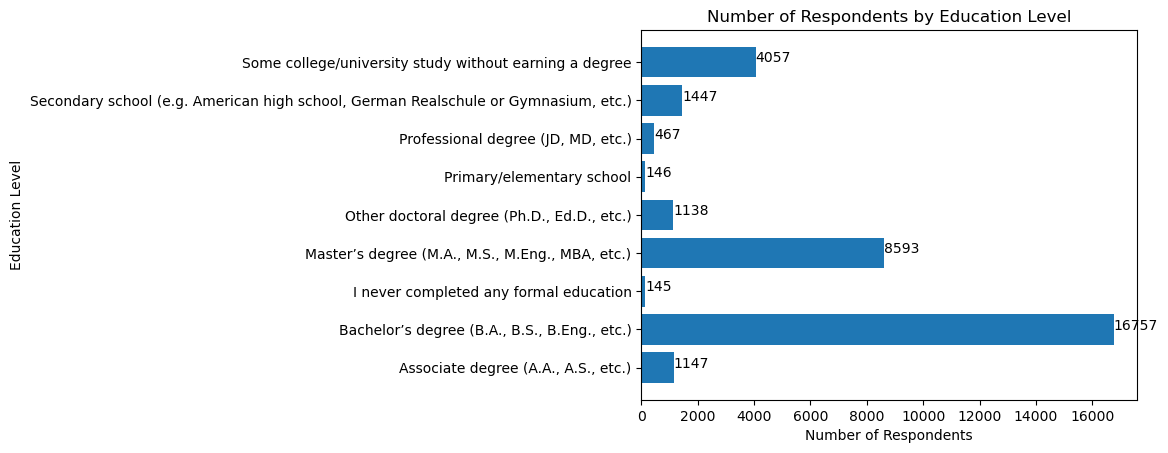

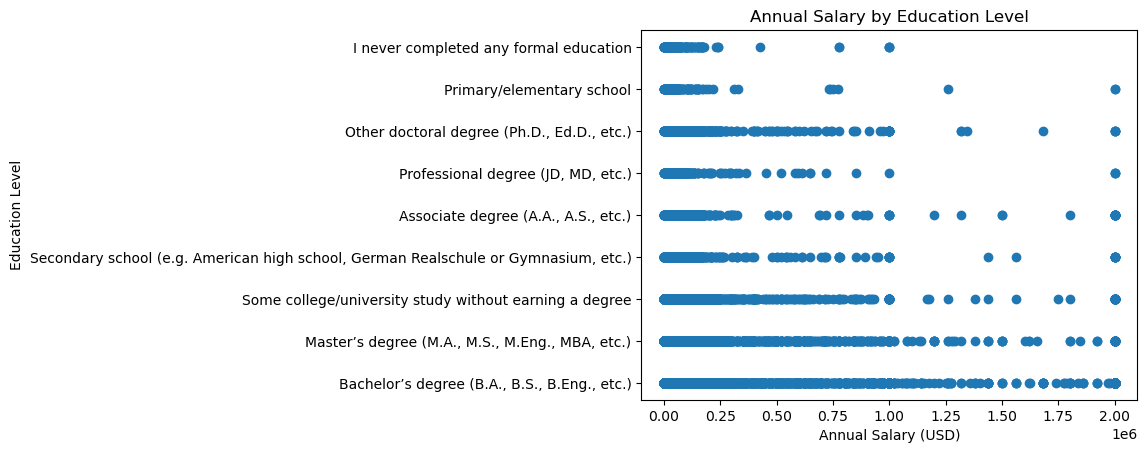

In [30]:
# YOUR CODE HERE
my_df = survey_df[['ConvertedComp','EdLevel']].dropna()

# Count respondents by Education Level
level_index, level_value = np.unique(my_df['EdLevel'], return_counts=True)

# Just to keep organised
my_df.EdLevel = my_df.EdLevel.astype("category")
my_df.EdLevel.cat.set_categories(level_index)

#Plot 1
plt.barh(level_index, level_value)
plt.title("Number of Respondents by Education Level")
plt.xlabel("Number of Respondents")
plt.ylabel("Education Level")
for index, value in enumerate(level_value):
    plt.text(value, index,
             str(value))
plt.show()

#Plot 2
plt.scatter(my_df['ConvertedComp'], my_df['EdLevel'])
plt.title("Annual Salary by Education Level")
plt.xlabel("Annual Salary (USD)")
plt.ylabel("Education Level")
plt.show()